# BIKE SHARING SYSTEM ML MODEL

### Importing libraries to be used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Data

In [3]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


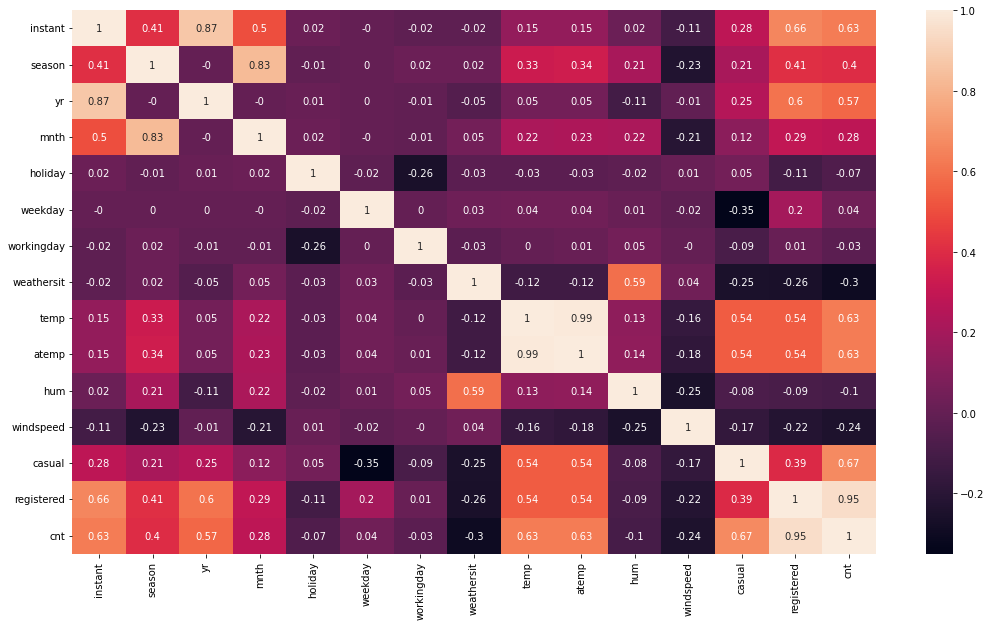

In [4]:
plt.figure(figsize=(18,10))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

### Reading/Understanding Data

In [3]:
data.shape

(730, 16)

In [4]:
data.info()

# Here we can see that dteday -> datatype is object so we have to convert this to data which we will do later on.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()


# Most important column in this is our target variable and as we can see
# mean and 50% percentile values are close which is a good sign 
# Where as there is a huge difference between min and max but this can be
# accepted from a new organization also 75% and max are not much far so overall data is healthy.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparing and Cleaning

In [6]:
#lets drop instant as its not important for our model
data.drop("instant",axis=1,inplace=True)

# changing data type of dteday
data["dteday"]=data["dteday"].astype("datetime64")

#creating dummy variable for season and weathersit
status1=pd.get_dummies(data["season"])
status1.rename(columns={1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)

status2=pd.get_dummies(data["weathersit"])
status2.rename(columns={1:"ClearDay",2:"CloudyDay",3:"Windy/RainingDay",4:"HeavyRainyDay"},inplace=True)

#Concating status1 and status2 with data
data=pd.concat([data,status1,status2],axis=1)

In [7]:
# Now dummies are added so we can remove original column (season,weathersit)
data=data.drop("season",axis=1)
data=data.drop("weathersit",axis=1)

In [8]:
# Adding No Of days
lis=[]
for i in range(1,data["dteday"].size+1):
    lis.append(i)
data["Nofdays"]=lis

In [9]:
#modifing workingday
lis=[]
for i in data["weekday"]:
    if i==6 or i==0:
        lis.append(1)
    else:
        lis.append(0)
data["workingday"]=lis

### Visualizing Data

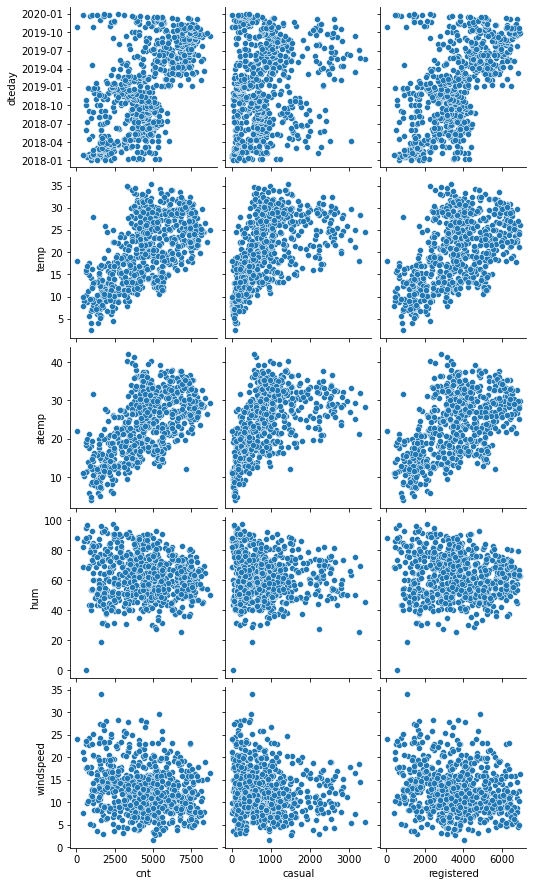

In [12]:
sns.pairplot(data=data,x_vars=["cnt","casual","registered"],y_vars=["dteday","temp","atemp","hum","windspeed"])
plt.show()

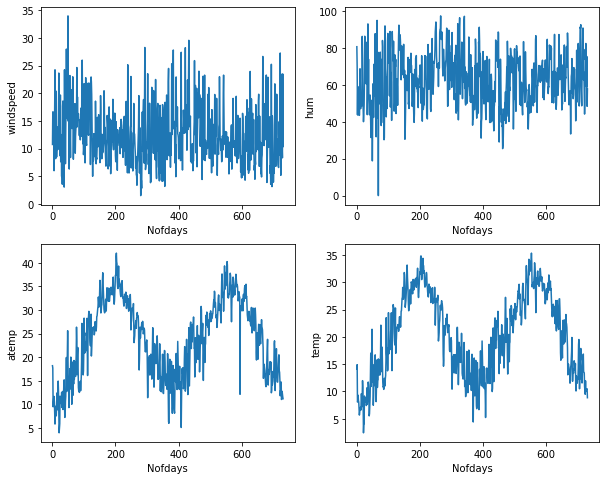

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.lineplot(data=data,x="Nofdays",y="windspeed")
plt.subplot(2,2,2)
sns.lineplot(data=data,x="Nofdays",y="hum")
plt.subplot(2,2,3)
sns.lineplot(data=data,x="Nofdays",y="atemp")
plt.subplot(2,2,4)
sns.lineplot(data=data,x="Nofdays",y="temp")
plt.show()

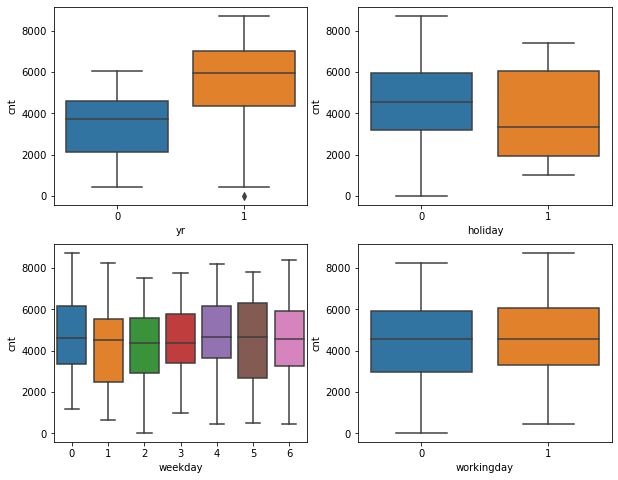

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(data=data,x="yr",y="cnt")
plt.subplot(2,2,2)
sns.boxplot(data=data,x="holiday",y="cnt")
plt.subplot(2,2,3)
sns.boxplot(data=data,x="weekday",y="cnt")
plt.subplot(2,2,4)
sns.boxplot(data=data,x="workingday",y="cnt")


plt.show()

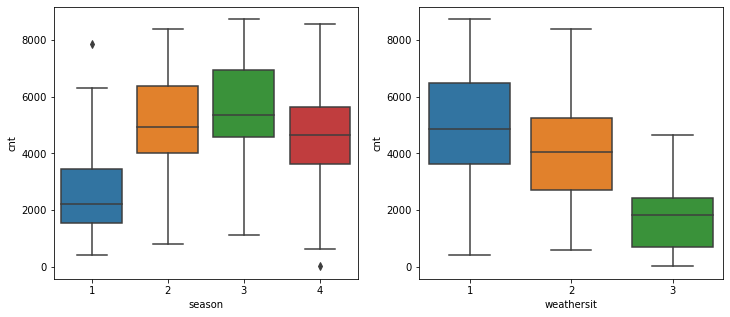

In [15]:
data2=pd.read_csv("day.csv")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=data2,x="season",y="cnt")
plt.subplot(1,2,2)
sns.boxplot(data=data2,x="weathersit",y="cnt")
plt.show()

#### Important Oservation from Visualization
     - Max demand of service is in summer and fall.
     - People prefer to use service in clear and cloudy days.
     - There is no specific hike in demand at weekends.
     - Demand Decrease during holidays.
     - Demand Increased in 2019 as compared to 2018.


### Creating train Test split and Recaling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data,test_data=train_test_split(data,train_size=.70,random_state=100)

In [12]:
pd.set_option('display.max_columns',None)
train_data.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Fall,Winter,ClearDay,CloudyDay,Windy/RainingDay,Nofdays
576,2019-07-31,1,7,0,3,0,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,1,0,1,0,0,577
426,2019-03-03,1,3,0,0,1,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,0,0,1,0,427
728,2019-12-30,1,12,0,1,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,0,1,0,0,729
482,2019-04-28,1,4,0,0,1,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,0,0,1,0,483
111,2018-04-22,0,4,0,0,1,13.803347,16.0977,72.9583,14.707907,177,1506,1683,0,1,0,0,0,1,0,112


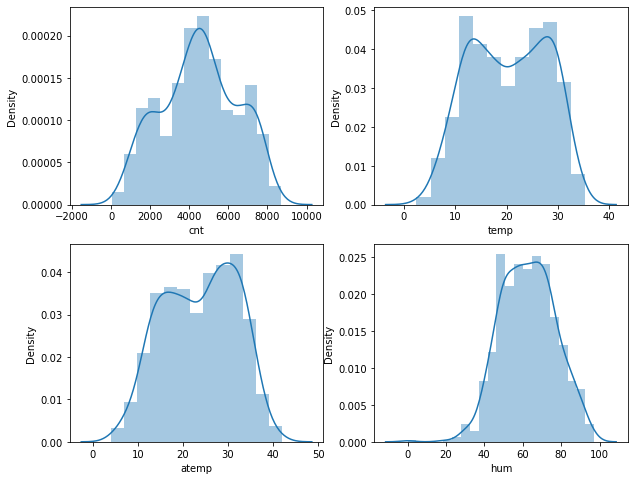

In [19]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(data["cnt"])
plt.subplot(2,2,2)
sns.distplot(data["temp"])
plt.subplot(2,2,3)
sns.distplot(data["atemp"])
plt.subplot(2,2,4)
sns.distplot(data["hum"])
plt.show()

#### We have two ways of Rescaleing data 
    - Normalization 
    - Standardisation
We will go with Normalization as data is not normally distributed for this
we will use MinMaxScaler.

In [14]:
scaler=MinMaxScaler()
num_var=["mnth","temp","atemp","hum","windspeed","casual","registered","cnt"]
train_data[num_var]=scaler.fit_transform(train_data[num_var])
train_data.head()

C:\Users\win10\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Fall,Winter,ClearDay,CloudyDay,Windy/RainingDay,Nofdays
576,2019-07-31,1,0.545455,0,3,0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,1,0,1,0,0,577
426,2019-03-03,1,0.181818,0,0,1,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,0,0,1,0,427
728,2019-12-30,1,1.000000,0,1,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,1,0,0,729
482,2019-04-28,1,0.272727,0,0,1,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,0,1,0,483
111,2018-04-22,0,0.272727,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,0,1,0,112


In [38]:
#Reshaping test data also
test_data[num_var]=scaler.transform(test_data[num_var])
test_data.shape

(220, 20)

#### Creating correlation matrix for relationship

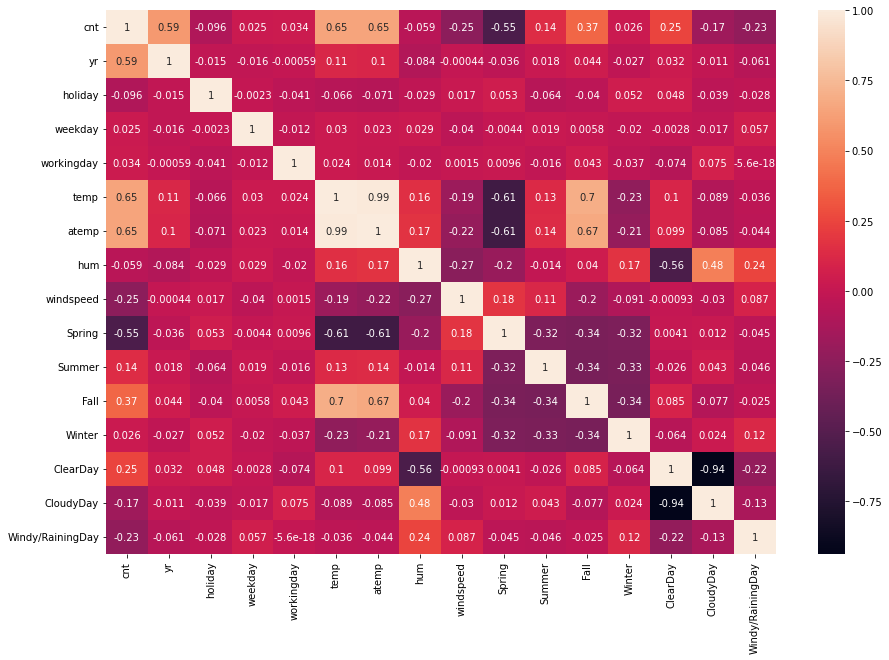

<Figure size 432x288 with 0 Axes>

In [21]:
arr=train_data[["cnt","yr","holiday","weekday","workingday","temp","atemp","hum","windspeed","Spring","Summer","Fall","Winter","ClearDay","CloudyDay","Windy/RainingDay"]]
plt.figure(figsize=(15,10))
sns.heatmap(arr.corr(),annot=True)
plt.show()
plt.savefig("corr_pic.jpg")

#### Creating X,y Train set

In [40]:
y_train=train_data.pop("cnt")
X_train=train_data
y_test=test_data.pop("cnt")
X_test=test_data

In [45]:
X_test.shape

(220, 20)

### 1. Model  

In [23]:
#adding constant
X_train_sm=sm.add_constant(X_train["yr"])
#creating model
lr=sm.OLS(y_train,X_train_sm)
#fit
lr_model=lr.fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.95e-49
Time:                        14:06:24   Log-Likelihood:                 148.67
No. Observations:                 510   AIC:                            -293.3
Df Residuals:                     508   BIC:                            -284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.131      0.0

### 2. Model  

- R-squared ->  Closer to 1 means its good.
- Adj R-squared -> for multiple independent variable.
- F-statistic -> For understanding the significance of overall regression model.
- Prob (F-statistic) -> less that 0.05 and large f statistic imply that there is linear relationship between indipendent and target variable.
- P value & T value -> p value should be lower than 0.05 and t value should be large.

In [24]:
X_train_sm=sm.add_constant(X_train[["yr","atemp"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

# Overall this model gives a good R squared, but let explore furthure.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          3.98e-132
Time:                        14:06:26   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.0

### 3. Model  

In [25]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Fall"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

# here we can see the model dint show any imporvment even after adding a new variable

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     391.2
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.24e-131
Time:                        14:06:27   Log-Likelihood:                 344.84
No. Observations:                 510   AIC:                            -681.7
Df Residuals:                     506   BIC:                            -664.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.017      3.083      0.0

### 4. Model  

In [26]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Fall","ClearDay"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     338.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.05e-141
Time:                        14:06:28   Log-Likelihood:                 371.32
No. Observations:                 510   AIC:                            -732.6
Df Residuals:                     505   BIC:                            -711.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.017      0.601      0.5

### 5. Model  

In [27]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Fall","ClearDay","weekday"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

# As we can see p value for weekday is high we weill remove this and not use in any model again.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          3.28e-140
Time:                        14:06:29   Log-Likelihood:                 371.53
No. Observations:                 510   AIC:                            -731.1
Df Residuals:                     504   BIC:                            -705.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.018      0.296      0.7

### 6. Model  

In [28]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Fall","ClearDay","workingday"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

# we can also notice that working day is also not much beneficial for us.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     272.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.14e-140
Time:                        14:06:29   Log-Likelihood:                 372.61
No. Observations:                 510   AIC:                            -733.2
Df Residuals:                     504   BIC:                            -707.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.017      0.259      0.7

### 7. Model

In [29]:
X_train_sm=sm.add_constant(X_train[["yr","temp","ClearDay","windspeed"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

#after addind windspeed we can see the it has improved the model little

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.85e-147
Time:                        14:06:30   Log-Likelihood:                 384.97
No. Observations:                 510   AIC:                            -759.9
Df Residuals:                     505   BIC:                            -738.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1175      0.019      6.237      0.0

### 8. Model

In [30]:
# Now lets try changing the day type.
X_train_sm=sm.add_constant(X_train[["yr","temp","CloudyDay","windspeed"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     335.7
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.06e-140
Time:                        14:06:31   Log-Likelihood:                 369.67
No. Observations:                 510   AIC:                            -729.3
Df Residuals:                     505   BIC:                            -708.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1844      0.019      9.461      0.0

### 9. Model

In [31]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Windy/RainingDay","windspeed"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     357.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.01e-145
Time:                        14:06:32   Log-Likelihood:                 381.36
No. Observations:                 510   AIC:                            -752.7
Df Residuals:                     505   BIC:                            -731.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1603      0.018  

### 10. Model

In [32]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Windy/RainingDay","ClearDay","CloudyDay","windspeed"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())

# this model also produced good r squared value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          5.43e-153
Time:                        14:06:32   Log-Likelihood:                 401.37
No. Observations:                 510   AIC:                            -790.7
Df Residuals:                     504   BIC:                            -765.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0688      0.015  

In [48]:
set=train_data[["yr","temp","Windy/RainingDay","ClearDay","CloudyDay","windspeed"]]
vif=pd.DataFrame()
vif["Features"]=set.columns
vif["VIF"]=[variance_inflation_factor(set.values,i) for i in range(set.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,ClearDay,8.77
4,CloudyDay,4.82
2,Windy/RainingDay,1.39
1,temp,1.06
5,windspeed,1.05
0,yr,1.02


### 11. Model

In [49]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Spring","Summer","Winter","windspeed","Windy/RainingDay","CloudyDay"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model_f2=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          2.82e-180
Time:                        18:58:29   Log-Likelihood:                 474.21
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     501   BIC:                            -892.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1457      0.030  

### VIF checking

In [38]:
# VIF for model 11 

set=train_data[["yr","temp","Spring","Summer","Winter","windspeed","Windy/RainingDay","CloudyDay"]]
vif=pd.DataFrame()
vif["Features"]=set.columns
vif["VIF"]=[variance_inflation_factor(set.values,i) for i in range(set.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,windspeed,4.59
1,temp,3.55
0,yr,2.07
2,Spring,1.94
3,Summer,1.80
4,Winter,1.60
7,CloudyDay,1.53
6,Windy/RainingDay,1.08


### Final Model

In [18]:
X_train_sm=sm.add_constant(X_train[["yr","temp","Spring","Summer","Winter","windspeed","Windy/RainingDay","ClearDay"]])
lr=sm.OLS(y_train,X_train_sm)
lr_model_final=lr.fit()
print(lr_model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          2.82e-180
Time:                        21:09:09   Log-Likelihood:                 474.21
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     501   BIC:                            -892.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1457      0.030  

In [19]:
# VIF for Final model 

set=train_data[["yr","temp","Spring","Summer","Winter","windspeed","Windy/RainingDay","ClearDay"]]
vif=pd.DataFrame()
vif["Features"]=set.columns
vif["VIF"]=[variance_inflation_factor(set.values,i) for i in range(set.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,windspeed,4.62
1,temp,4.32
7,ClearDay,2.81
0,yr,2.07
2,Spring,1.99
3,Summer,1.76
4,Winter,1.58
6,Windy/RainingDay,1.11


### Residual analysis

In [20]:
y_train_pred=lr_model_final.predict(X_train_sm)
y_train_pred

576    0.793835
426    0.463248
728    0.381023
482    0.575008
111    0.287264
         ...   
578    0.828752
53     0.212737
350    0.267260
79     0.318706
520    0.644018
Length: 510, dtype: float64

C:\Users\win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

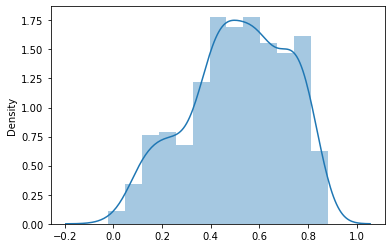

In [21]:
sns.distplot(y_train_pred)

<AxesSubplot:ylabel='Density'>

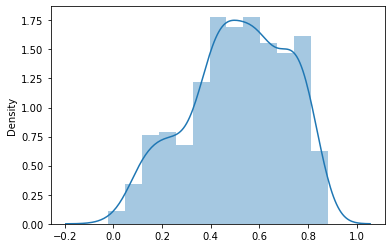

In [50]:
### final model 2
y_train_pred2=lr_model_f2.predict(X_train_sm)
sns.distplot(y_train_pred2)

### Prediction on test 

In [22]:
X_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Spring,Summer,Fall,Winter,ClearDay,CloudyDay,Windy/RainingDay,Nofdays
576,2019-07-31,1,0.545455,0,3,0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,1,0,1,0,0,577
426,2019-03-03,1,0.181818,0,0,1,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,0,0,1,0,427
728,2019-12-30,1,1.000000,0,1,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,1,0,0,729
482,2019-04-28,1,0.272727,0,0,1,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,0,0,1,0,483
111,2018-04-22,0,0.272727,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0,1,0,0,0,1,0,112


In [23]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [46]:
X_test_sm=sm.add_constant(X_test[["yr","temp","Spring","Summer","Winter","windspeed","Windy/RainingDay","ClearDay"]])
X_test_sm.head()

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yr,temp,Spring,Summer,Winter,windspeed,Windy/RainingDay,ClearDay
184,1.0,0,0.831783,0,0,0,0.084219,0,0
535,1.0,1,0.901354,0,1,0,0.153728,0,1
299,1.0,0,0.511964,0,0,1,0.334206,0,0
221,1.0,0,0.881625,0,0,0,0.339570,0,1
152,1.0,0,0.817246,0,1,0,0.537414,0,1


In [47]:
y_test_pred=lr_model_final.predict(X_test_sm)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7969090137239032

### R2 Score is -> 0.7969 